<a href="https://colab.research.google.com/github/HammadN98/Formacao_MachineLearning_Specialist/blob/main/Projeto3_MetricasDeAvaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codigo dado pelo professor com alguns ajustes propiros por causa de incompatibilidade da versao usada por ele, com a versao atual do tensorflow.

In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
tf.__version__

'2.12.0'

In [5]:
%load_ext tensorboard

In [6]:
logdir='log'

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
from keras.api._v2.keras import activations
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64,(3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64,(3, 3), activation= 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1474 - accuracy: 0.9535 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0347 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0319 - val_accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0377 - val_accuracy: 0.9879


In [20]:
y_true= test_labels

In [22]:
y_pred_probabilities = model.predict(test_images)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


In [23]:
classes = [0,1,2,3,4,5,6,7,8,9]

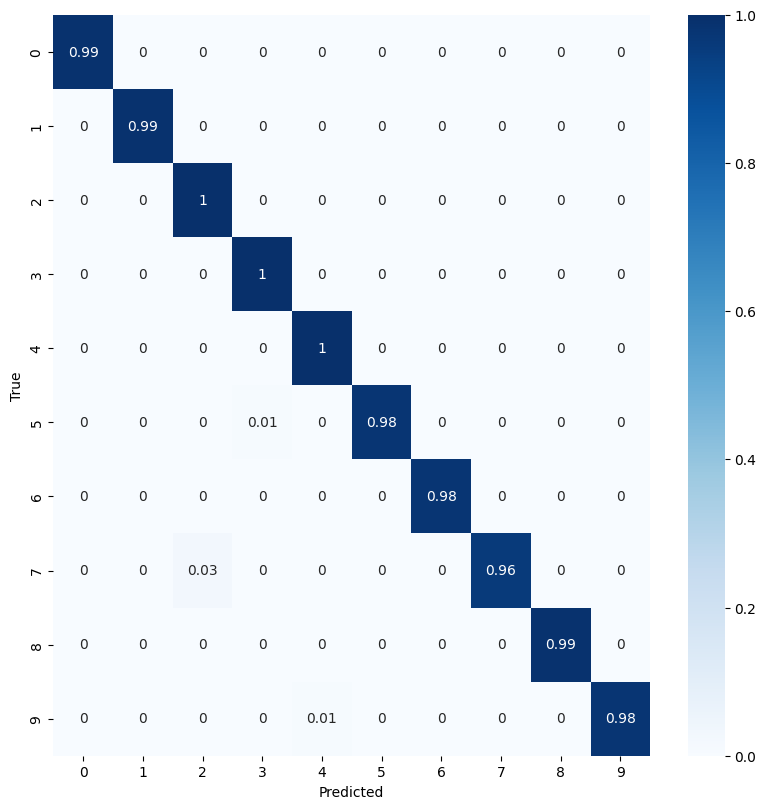

In [24]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:np.newaxis], decimals=2)

# Assuming you have already defined classes
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

Aqui começa Projeto:
Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Para que seja possível implementar estas funções, você deve utilizar os métodos e suas fórmulas correspondentes (Tabela 1).

Para a leitura dos valores de VP, VN, FP e FN, será necessário escolher uma matriz de confusão para a base dos cálculos. Essa matriz você pode escolher de forma arbitraria, pois nosso objetivo é entender como funciona cada métrica.  

In [38]:
#Atribuido cada espaço da matriz de confusao para seu valor
VP = con_mat[0, 0]
FN = con_mat[0, 1]
FP = con_mat[1, 0]
VN = con_mat[1, 1]

#Realizando os calculos de forma manual como especificado no projeto
sensibilidade = VP / (VP+FN)
especificidade = VN / (FP + VN)
acuracia = (VP + VN) / (VP + VN + FP + FN)
precisao = VP / (VP + FP)
fscore = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print("Cálculo de Métricas de Avaliação de Aprendizado:\n")
print("Sensibilidade:", sensibilidade)
print("Especificidade:", especificidade)
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("F-Score:", fscore)


Cálculo de Métricas de Avaliação de Aprendizado:

Sensibilidade: 0.9989754098360656
Especificidade: 1.0
Acurácia: 0.9995249406175772
Precisão: 1.0
F-Score: 0.9994874423372629
